In [1]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 56.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 51.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.4 MB/s eta 0:00:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

### Question 1

Batch Normalization refers to the technique of passing the dataset in mini batches instead of the complete dataset as one in each iteration.

For Example: 

- Without this technique the dataset is passed completely and the weights are biases are initialized at random in the first iteration which most probably will not be optimal
- But with this technique when applied (let's say batch size = 32 and dataset has 1000 records) instead of 1000 records in one iteration we pass batches of 32 as one epoch so by the first iteration ends we already have some weights and biases calculates batch after batch which may not be optimal but still more accurate than random initialization.

### Question 2

Benefits of Batch Normalization:

1. Regularizes the model
2. Speeds up learning
3. Allows higher learning rates

### Question 3

Normalization Step:
1. During training, batch normalization operates on a mini-batch of data.
2. For each feature (neuron activation), it calculates the mean and standard deviation across the mini-batch.
3. The activations are then normalized by subtracting the mean and dividing by the standard deviation.
4. This ensures that the input to each layer has a consistent scale and distribution.

Learnable Parameters:

After normalization, the result is scaled and shifted using two learnable parameters:
- Gamma (γ): Scales the normalized values.
- Beta (β): Shifts the scaled values.

## Code and Implementation

In [3]:
import tensorflow as tf
import keras
from keras import layers

2024-03-07 08:22:50.810270: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 08:22:50.875081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 08:22:50.875151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 08:22:50.876486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 08:22:50.885267: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-07 08:22:50.885934: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [4]:
## Loading the data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# Dividing the dataset with 255 to scale it between 0 and 1

x_train_scaled = x_train/255
x_test_scaled = x_test/255
y_train_scaled = y_train/255
y_test_scaled = y_test/255

In [6]:
# Defining the model with and without batch normalization layer

model_1 = keras.Sequential (
            [
                layers.Flatten(name = "input_layer"),
                layers.Dense(500, activation="relu", name = "Layer_1"),
                layers.Dense(200, activation="relu", name = "Layer_2"),
                layers.Dense(50, activation="relu", name = "Layer_3"),
                layers.Dense(10, activation="softmax", name = "output_layer")
            ]
)

model_2 = keras.Sequential (
            [
                layers.Flatten(name = "input_layer"),
                layers.Dense(500, activation="relu", name = "Layer_1"),
                layers.Dense(200, activation="relu", name = "Layer_2"),
                layers.BatchNormalization(),
                layers.Dense(50, activation="relu", name = "Layer_3"),
                layers.Dense(10, activation="softmax", name = "output_layer")
            ]
)

model_3 = keras.Sequential (
            [
                layers.Flatten(name = "input_layer"),
                layers.BatchNormalization(),
                layers.Dense(500, activation="relu", name = "Layer_1"),
                layers.Dense(200, activation="relu", name = "Layer_2"),
                layers.BatchNormalization(),
                layers.Dense(50, activation="relu", name = "Layer_3"),
                layers.Dense(10, activation="softmax", name = "output_layer")
            ]
)

In [11]:
model_1.layers

In [12]:
model_2.layers

In [13]:
model_3.layers

In [7]:
OPTIMIZER = "SGD"
LOSS = "sparse_categorical_crossentropy"
METRICS = "accuracy"

In [24]:
## Without batch normalization

model_1.compile(optimizer=OPTIMIZER,
               loss=LOSS,
               metrics=METRICS)

history = model_1.fit(x_train, y_train, batch_size = 64, epochs = 10)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: nan - categorical_accuracy: 1.0000
Epoch 10/10
938/938

In [25]:
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 Layer_1 (Dense)             (None, 500)               392500    
                                                                 
 Layer_2 (Dense)             (None, 200)               100200    
                                                                 
 Layer_3 (Dense)             (None, 50)                10050     
                                                                 
 output_layer (Dense)        (None, 10)                510       
                                                                 
Total params: 503260 (1.92 MB)
Trainable params: 503260 (1.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
loss_1 = history.history["loss"]
accuracy_1 = history.history["categorical_accuracy"]
print(history.history)

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'categorical_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


In [8]:
## Compile and train the model

list_of_models = [model_1, model_2, model_3]

def train_evaluate(model, epoch = 10, batch_size = 64):
    model.compile(optimizer = OPTIMIZER,
                 loss = LOSS,
                 metrics = METRICS)
    
    history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epoch)
    print("Model summary : {}".format(model.summary()))
    print("History : {}".format(history.history))
    
    loss = history.history["loss"]
    accuracy = history.history["accuracy"]
    return (loss, accuracy)

In [9]:
## Training part 

accuracy_loss = []

for model in list_of_models:
    accuracy_loss.append(train_evaluate(model))

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0985
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
938/938 [==============================] - 5s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
938/938 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
938/938 [==============================] - 4s 5ms/step - loss: nan - accuracy: 0.0987
Model: "sequential"
_________

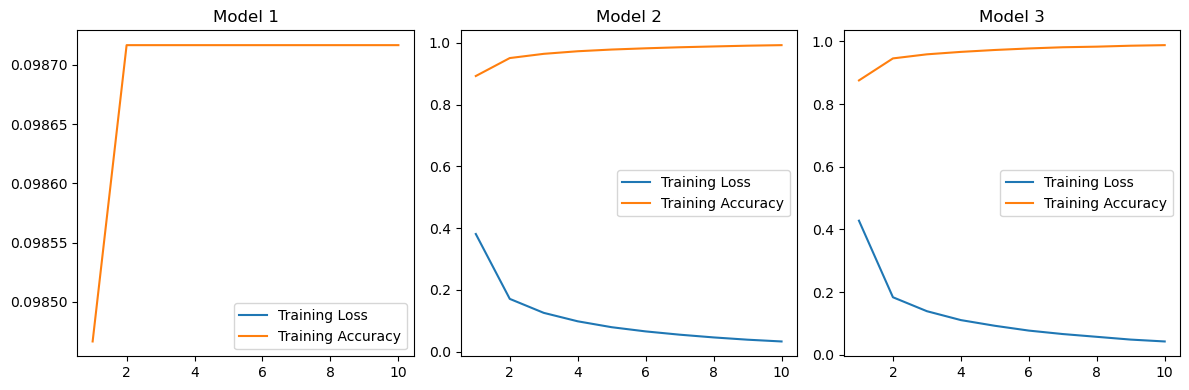

In [10]:

plt.figure(figsize = (12,4))
for  i, (loss, accuracy) in enumerate(accuracy_loss):
    plt.subplot(1,3,i+1)
    plt.title(f"Model {i+1}")
    plt.plot(range(1,11),loss, label = "Training Loss")
    plt.plot(range(1,11), accuracy, label = "Training Accuracy")
    plt.legend()
    plt.tight_layout()

## Batch_Size = 32

In [11]:
accuracy_loss = []

for model in list_of_models:
    accuracy_loss.append(train_evaluate(model, batch_size = 32))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Model: "s

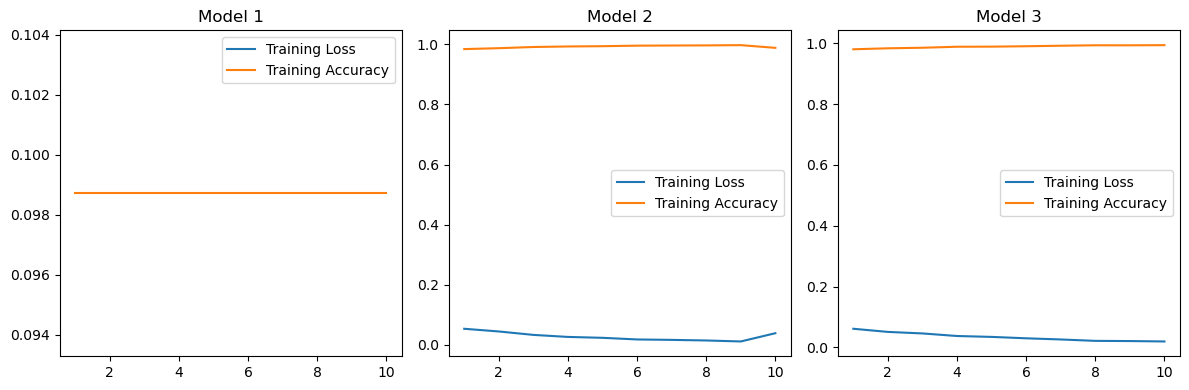

In [12]:

plt.figure(figsize = (12,4))
for  i, (loss, accuracy) in enumerate(accuracy_loss):
    plt.subplot(1,3,i+1)
    plt.title(f"Model {i+1}")
    plt.plot(range(1,11),loss, label = "Training Loss")
    plt.plot(range(1,11), accuracy, label = "Training Accuracy")
    plt.legend()
    plt.tight_layout()

## Batch Size = 100

In [13]:
accuracy_loss = []

for model in list_of_models:
    accuracy_loss.append(train_evaluate(model, batch_size = 100))

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
600/600 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
600/600 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.0987
Model: "sequential"
_________

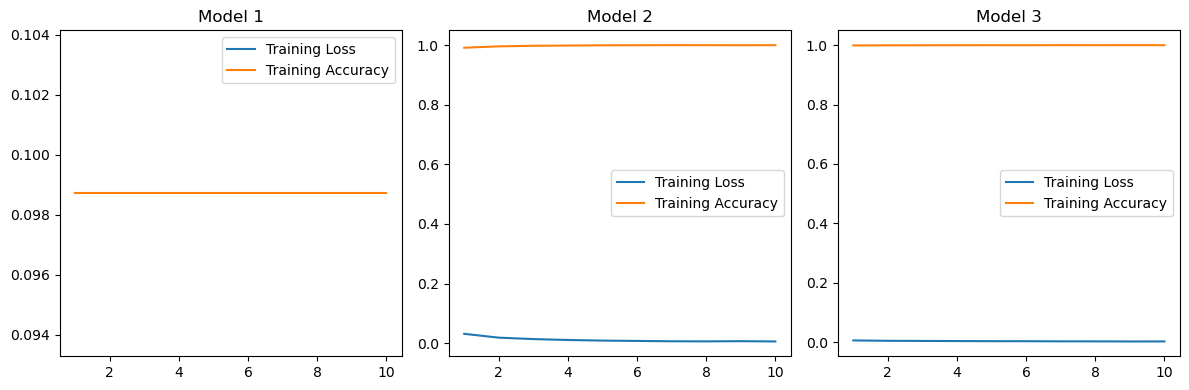

In [14]:
plt.figure(figsize = (12,4))
for  i, (loss, accuracy) in enumerate(accuracy_loss):
    plt.subplot(1,3,i+1)
    plt.title(f"Model {i+1}")
    plt.plot(range(1,11),loss, label = "Training Loss")
    plt.plot(range(1,11), accuracy, label = "Training Accuracy")
    plt.legend()
    plt.tight_layout()

In [16]:
test_loss_1, test_accuracy_1 = model_1.evaluate(x_test, y_test)
test_loss_2, test_accuracy_2 = model_2.evaluate(x_test, y_test)
test_loss_3, test_accuracy_3 = model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1728 - accuracy: 0.9747


In [18]:
print(f"Model without batch normalizaton - Loss : {test_loss_1} and accuracy : {test_accuracy_1}" )

print(f"Model batch normalizaton - Loss : {test_loss_2} and accuracy : {test_accuracy_2}" )

print(f"Model with two layers batch normalizaton - Loss : {test_loss_3} and accuracy : {test_accuracy_3}" )

Model without batch normalizaton - Loss : nan and accuracy : 0.09799999743700027
Model batch normalizaton - Loss : 0.0730183869600296 and accuracy : 0.9797000288963318
Model with two layers batch normalizaton - Loss : 0.17279314994812012 and accuracy : 0.9746999740600586


### Question 6

When batch normalization is applied it tends to prevent the model from overfitting and also scales the features for a better learning and tends to converge faster.

Without it the model sometimes highly overfits or tends to not learn the pattern at all.

### Question 7

The different batch sizes dont make much of a difference but here the the models with slightly higher batch sizes had a better training accuracy overall. In general the batch size is a hyperparamter and must be tuned according to the usecase.

### Question 8

#### **Advantages of Batch Normalization:**

1. **Stabilizing Training Process:**
   
2. **Faster Convergence:**

3. **Regularization Effect:**

4. **Higher Learning Rates:**

#### **Potential Limitations:**

1. **Computational Overhead:**

2. **Dependency on Mini-Batch Size:**

3. **Incompatibility with Recurrent Networks:**